<a href="https://colab.research.google.com/github/Manthan2110/AI-Powered-Face-Authenticator/blob/main/Models/face_recognition_using_FaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install onnxruntime
!pip install mtcnn
!pip install onnx

In [ ]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread('/content/drive/MyDrive/dataset/robert_downey/4.jpg')

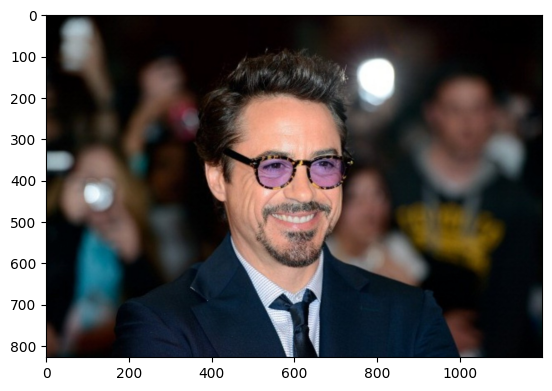

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
result = detector.detect_faces(img)

In [ ]:
result

[{'box': [467, 241, 254, 341],
  'confidence': np.float64(0.9997540712356567),
  'keypoints': {'nose': [np.int64(626), np.int64(443)],
   'mouth_right': [np.int64(661), np.int64(482)],
   'right_eye': [np.int64(663), np.int64(370)],
   'left_eye': [np.int64(550), np.int64(371)],
   'mouth_left': [np.int64(552), np.int64(486)]}},
 {'box': [945, 163, 113, 151],
  'confidence': np.float64(0.9871354103088379),
  'keypoints': {'nose': [np.int64(1025), np.int64(264)],
   'mouth_right': [np.int64(1044), np.int64(293)],
   'right_eye': [np.int64(1047), np.int64(228)],
   'left_eye': [np.int64(991), np.int64(232)],
   'mouth_left': [np.int64(1000), np.int64(295)]}}]

In [ ]:
x, y, w, h = result[0]['box']

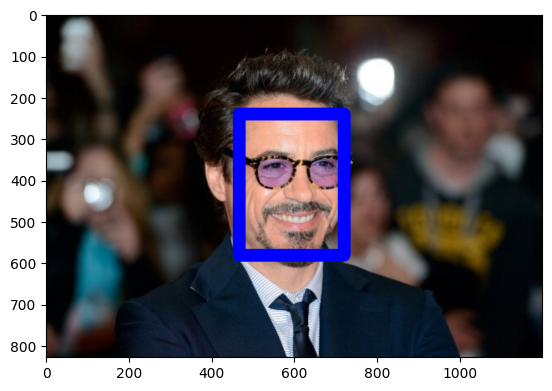

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

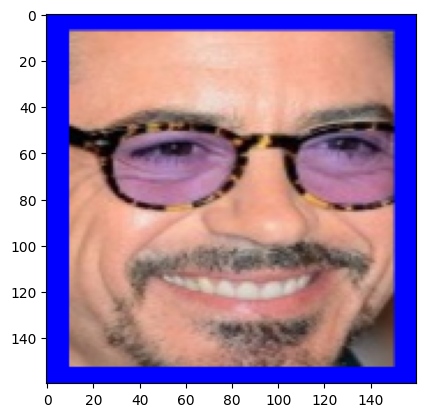

In [ ]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
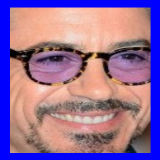

In [ ]:
my_face

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []           #Used to store faces
        self.Y = []           #Used to store labels
        self.detector = MTCNN()


    def extract_face(self, filename, required_size=(160, 160)): # Changed to self and filename
        try:
            # image = Image.open(filename).convert('RGB')  # Remove this line as it's not needed
            image = Image.open(filename).convert('RGB') # Opening the file here
            pixels = np.asarray(image)
            results = self.detector.detect_faces(pixels) # Changed to self.detector
            if results:
                x1, y1, width, height = results[0]['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height
                face = pixels[y1:y2, x1:x2]
                face_image = Image.fromarray(face)
                face_image = face_image.resize(required_size)
                return np.asarray(face_image)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
        return None


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path) # Changed to self
                # Append only if a face was detected
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=8474c167bc510e9d67effcb8927ed273854fe92fffd53aeb2d2304db691b71bf
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
facenet_model = FaceNet()

def get_embedding(face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    sample = np.expand_dims(face_pixels, axis=0)
    # Get the actual model for prediction
    model = facenet_model.model
    embedding = model.predict(sample)                      # Use the model's predict method
    return embedding[0]                                    # 512D image (1x1x512)

In [ ]:
# Create dictionary of known faces
known_embeddings = {}
dataset_path = '/content/drive/MyDrive/dataset'
faceloading = FACELOADING('/content/drive/MyDrive/dataset')

for person_folder in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person_folder)
    for filename in os.listdir(person_path):
        full_path = os.path.join(person_path, filename)
        face = faceloading.extract_face(full_path)
        if face is not None:
            embedding = get_embedding(face)
            known_embeddings[full_path] = embedding

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# Match and return paths where faces are recognized
threshold = 0.5  # lower is stricter
match_results = {}

In [ ]:
file_paths = list(known_embeddings.keys())
embeddings = list(known_embeddings.values())

for i in range(len(file_paths)):
    face_i = embeddings[i]
    matches = []
    for j in range(len(file_paths)):
        if i == j:
            continue
        face_j = embeddings[j]
        sim = cosine_similarity([face_i], [face_j])[0][0]
        if sim > (1 - threshold):  # cosine similarity is higher when faces are similar
            matches.append(file_paths[j])
    match_results[file_paths[i]] = matches

In [ ]:
input_image_path = '/content/drive/MyDrive/dataset/sardor_abdirayimov/6.jpg'

# Display results for the input image only
if input_image_path in match_results:
    matched_paths = match_results[input_image_path]
    print(f"\nFace from '{input_image_path}' is recognized in:")
    for match in matched_paths:
        print(f"  - {match}")
else:
    print(f"\nNo matches found for face from '{input_image_path}'")


Face from '/content/drive/MyDrive/dataset/sardor_abdirayimov/6.jpg' is recognized in:
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/8.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/10.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/7.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/2.png
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/9.jpg
  - /content/drive/MyDrive/dataset/sardor_abdirayimov/5.png
